In [20]:
import matplotlib.pyplot as plt
import numpy as np

# total sampled time whne plotting functions
# in seconds
SAMPLED_TIME = 1
WALK_PERIOD = 1
BASE_FOOT_LIFT = 0.01

FORWARD = 0.1
LEFT = 0
TURN = 0

x = np.linspace(0, SAMPLED_TIME, SAMPLED_TIME * 100)

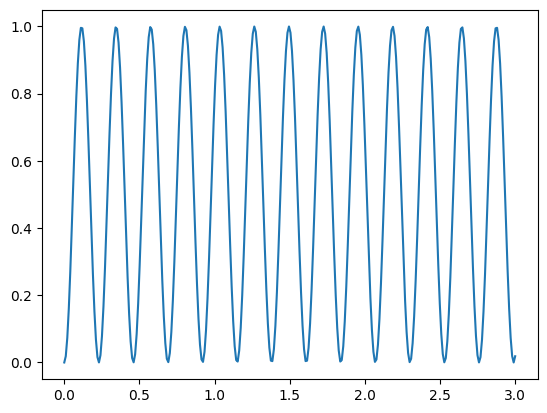

In [15]:
def parabolic_return (x):
    """
    Parabolic return
    This is a helper function that returns a value on [0, 1] using a parabolic shape.
    """
    return 0.5 * np.sin(2.0 * np.pi * x - np.pi / 2) + 0.5


plt.plot(x, [parabolic_return(i / WALK_PERIOD) for i in x])
plt.show()

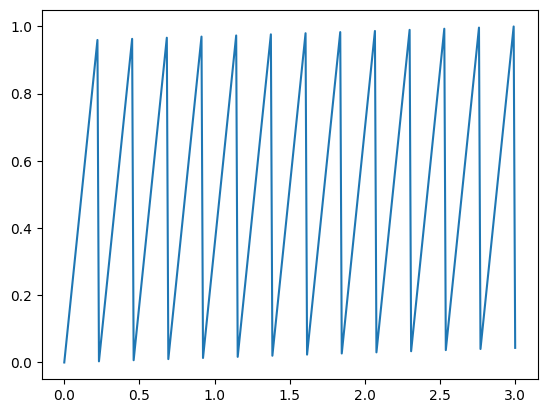

In [16]:
def linear_step(time, period):
    """
    Linear step, a function that returns a value between 0, 1 linearly based on the progression
    from time based on the provided period. This function is used to accelerate with a constant speed.
    """
    return np.clip(time / period, 0, 1)


plt.plot(x, [linear_step(i % WALK_PERIOD, WALK_PERIOD) for i in x])
plt.show()

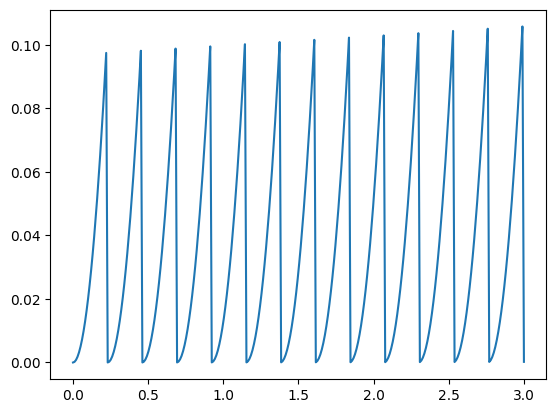

In [17]:
def parabolic_step(x):
    """
    Parabolic step, a function that returns a value between 0, 1 providing constant acceleration to get to the half way point,
    which then turns into constant decelartion to reach its target.
    """
    if x < 0.5:
        return 2 * (x ** 2)
    else:
        return 4 * x - (2 * (x ** 2)) - 1

plt.plot(x, [parabolic_step(i % WALK_PERIOD) for i in x])
# plt.plot(x, [parabolic_step((i / 100) / WALK_PERIOD) for i in x])
plt.show()

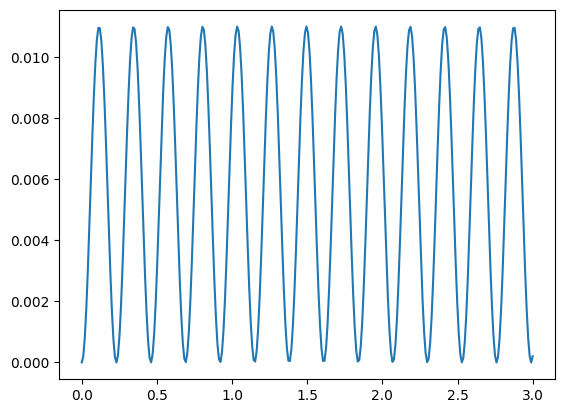

In [18]:
# using these functions we can plot the max foot height
max_foot_height = BASE_FOOT_LIFT + (FORWARD * 0.01) + (LEFT * 0.02)

plt.plot(x, [max_foot_height * parabolic_return(i / WALK_PERIOD) for i in x])
plt.show()


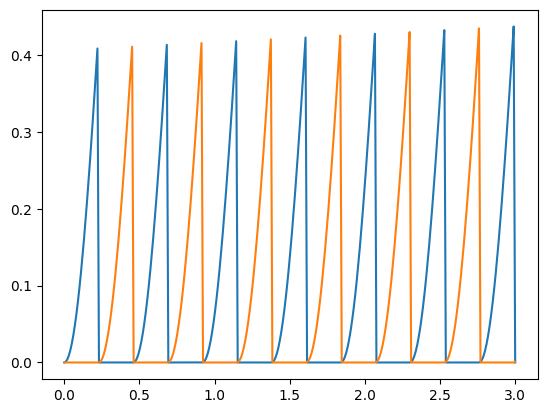

In [19]:
left = []
right = []

support = False

for i in x:
    t = i % WALK_PERIOD
    if t <= 0.01:
        support = not support
    if support:
        left.append(parabolic_return(t))
        right.append(0)
    else:
        left.append(0)
        right.append(parabolic_return(t))


plt.plot(x, left)
plt.plot(x, right)
plt.show()